In [ ]:
# comparing 2D LD count (RLP) to 3D LD count (JDW)

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wesanderson

In [118]:
ldFile = 'C:/Users/jaked/Documents/Tsai2025/Subiculum-LD/data/LD.csv'
ldDf = pd.read_csv(ldFile)

id_regex = r'mouse\s*(\d+)'
ldDf['ID'] = ldDf['Image'].str.extract(id_regex)

gender_regex = r'([FM])'
ldDf['Gender'] = ldDf['Image'].str.extract(gender_regex)

treatment = ldDf['Image'].apply(lambda x: 'rLP' in x)
ldDf['Treatment'] = np.where(treatment, 'rLP', 'control')

ldDf['Subiculum Volume'] = ldDf['Subiculum Area'] * ldDf['Z Stack']

ldDf['3D LD Density'] = ldDf['3D LD Count'] / ldDf['Subiculum Volume']

ldDf = ldDf[['ID', 'Gender', 'Treatment', '3D LD Count', '3D LD Density', '2D LD Count', 'Avg Vol', \
            'Integrated Intensity Density', 'Subiculum Volume']]

ldDf

,ID,Gender,Treatment,3D LD Count,3D LD Density,2D LD Count,Avg Vol,Integrated Intensity Density,Subiculum Volume
0,3,F,rLP,17580,0.000054,7812,3.4183,2.059024e+11,326506530
1,2,M,rLP,7837,0.000020,1290,1.7929,1.537433e+11,391507830
2,1,F,control,24702,0.000081,9632,2.8180,2.976352e+11,304739428


In [134]:
palette = wesanderson.film_palette('The Grand Budapest Hotel')
sns.set_palette(palette)
sns.set_style('white')

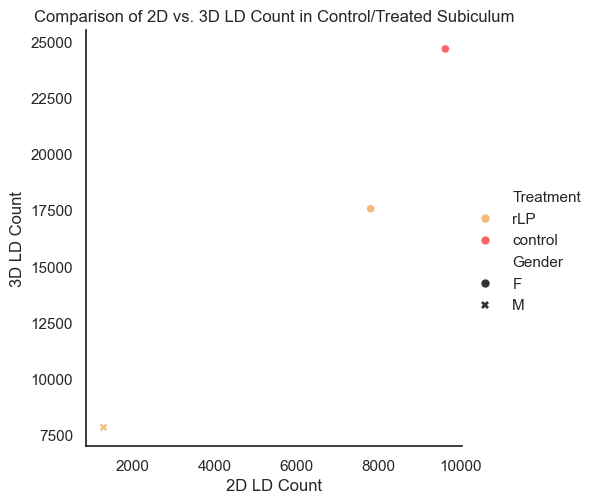

In [135]:
# how closely do our 3D and 2D counts align?

sns.relplot(data=ldDf, x='2D LD Count', y='3D LD Count', hue='Treatment', style='Gender') \
   .set(title = 'Comparison of 2D vs. 3D LD Count in Control/Treated Subiculum')

Text(0.5, 1.0, '(3D) LD Clearance by Treatment')

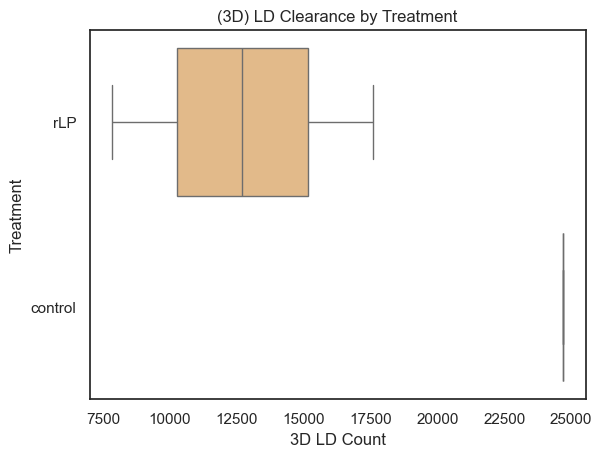

In [152]:
# quantify LD clearance by treatment

sns.boxplot(data=ldDf, x="3D LD Count", y='Treatment') # hue='Gender'
plt.title('(3D) LD Clearance by Treatment')

Text(0.5, 1.0, '(2D) LD Clearance by Treatment')

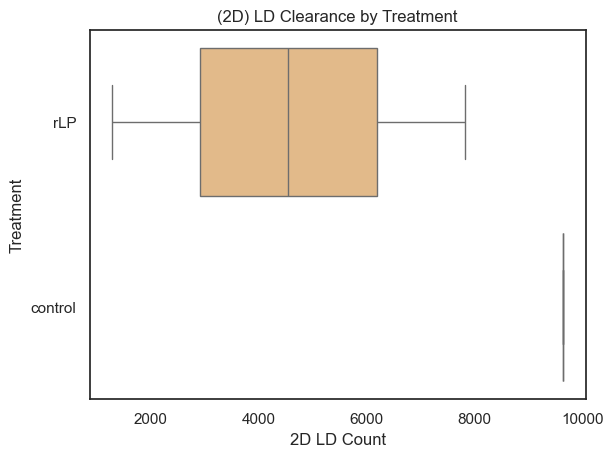

In [143]:
# quantify LD clearance by treatment

sns.boxplot(data=ldDf, x="2D LD Count", y='Treatment') # hue='Gender'
plt.title('(2D) LD Clearance by Treatment')

Text(0.5, 1.0, 'LD Density by Treatment')

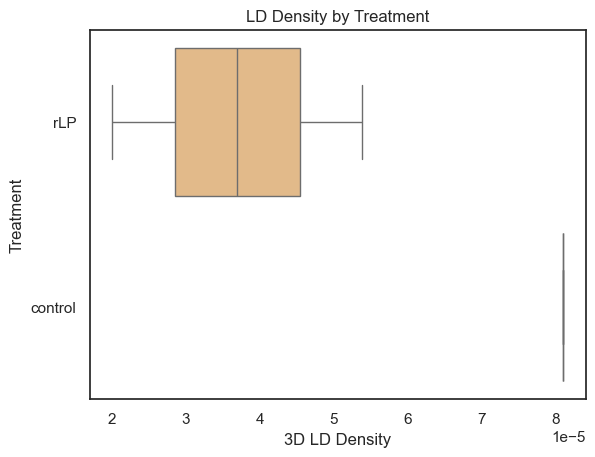

In [145]:
# changes in LD density by treatment -- should observe the same as count

sns.boxplot(data=ldDf, x="3D LD Density", y='Treatment') # hue='Gender'
plt.title('LD Density by Treatment')

Text(0.5, 1.0, 'Avg LD Vol by Treatment')

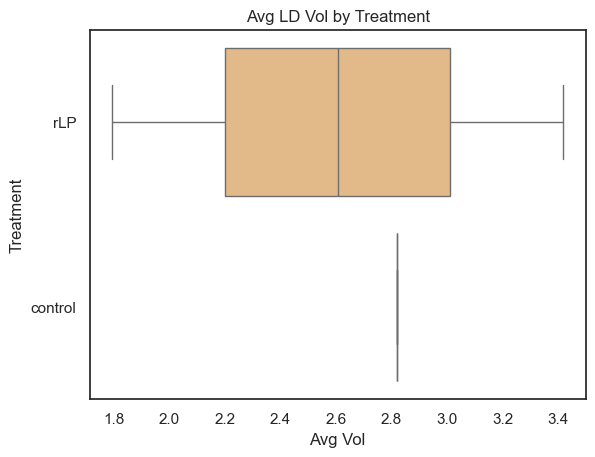

In [146]:
# changes in LD vol

sns.boxplot(data=ldDf, x='Avg Vol', y='Treatment')
plt.title('Avg LD Vol by Treatment')

Text(0.5, 1.0, 'IID vs. 3D LD Count')

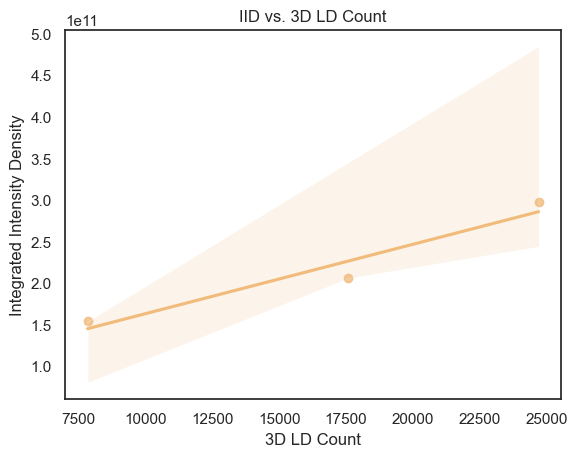

In [136]:
# does IID validate our calculation of LD count?

sns.regplot(data=ldDf, x="3D LD Count", y="Integrated Intensity Density")
plt.title("IID vs. 3D LD Count")

Text(0.5, 1.0, 'IID vs. 3D LD Density')

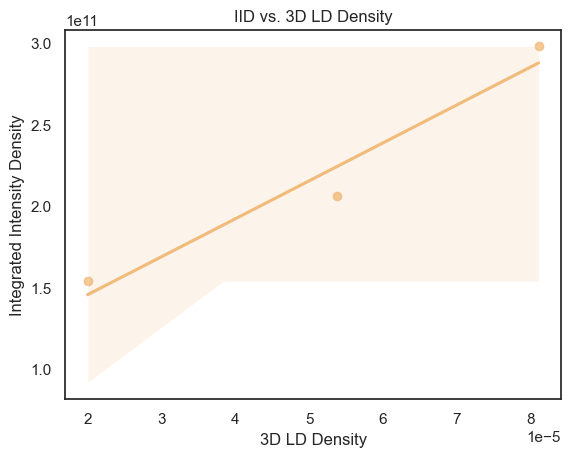

In [137]:
# does IID validate our calculation of LD density?

sns.regplot(data=ldDf, x="3D LD Density", y="Integrated Intensity Density")
plt.title("IID vs. 3D LD Density")

In [ ]:
# needs more data to measure ΔLD_Count w/i one mouse